In [1]:
%matplotlib inline

# Regression Model

## Live Demos

In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

## Linear Regression  model

#### Regression is model that predict continious numeric variable.
$y = ax+b+\epsilon $                   $\epsilon - noise$

In [3]:
# Generate data.
num_points = 2000
x = np.linspace(-3, 5, num_points)
y = 2 * x + 3
y_noise = np.random.normal(loc=0, scale=2, size=num_points)
y += y_noise
# the noise must be not dependent from the data

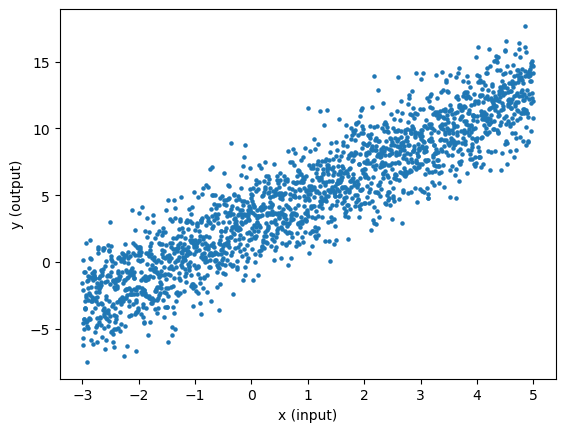

In [4]:
plt.scatter(x, y, s=5)
plt.xlabel('x (input)')
plt.ylabel('y (output)')

plt.show()

In [5]:
data = pd.DataFrame({'x':x, 'y':y})
data = data.sample(len(data))
data.to_csv('data.csv', index=None)

In [6]:
data = pd.read_csv('data.csv')

In [7]:
data

,x,y
0,2.534767,8.753744
1,0.841921,1.338869
2,0.813907,6.462733
3,-2.967984,-4.238683
4,-1.303152,0.155569
...,...,...
1995,2.474737,8.737459
1996,-2.863932,-4.269637
1997,1.134067,2.631605
1998,3.331166,5.905217


In [8]:
# y = a * x + b
# we are searching the best value for a and b
x = data.x.values
y = data.y.values

In [9]:
a,b = 5, 3

In [10]:
def mse(observer, estimated):
    return ((y - estimated) ** 2).mean()

In [11]:
def plot_model(x,y, a,b):
    y_model = a * x + b
    model_mse = mse(y, y_model)
    plt.plot(x, y_model, c='r', label=f'y= {a:.2f}x+{b:.2f}; mse={model_mse:.2f}')
    plt.scatter(x, y)

    plt.xlabel('x')
    plt.ylabel('y (output)')
    plt.legend()
    plt.show()

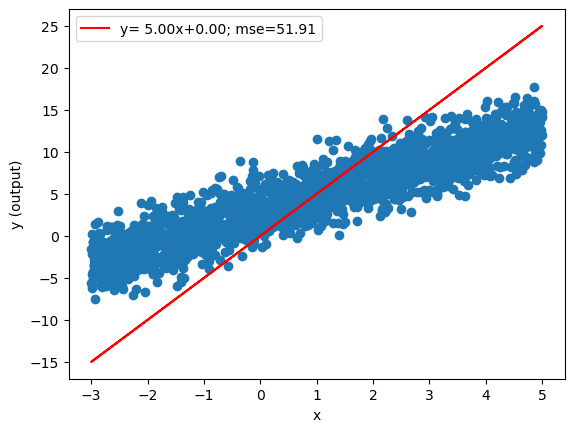

In [12]:
plot_model(x,y,5,0)

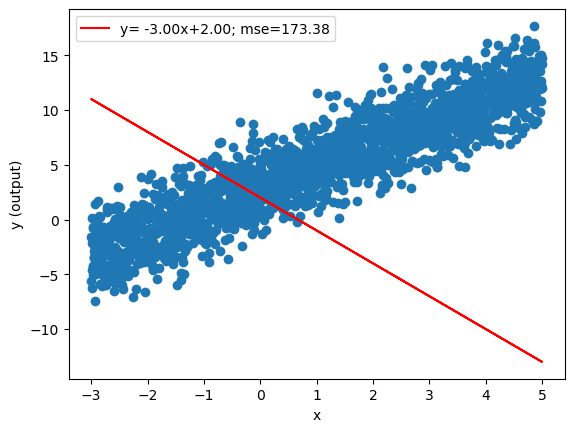

In [13]:
plot_model(x,y,-3,2)

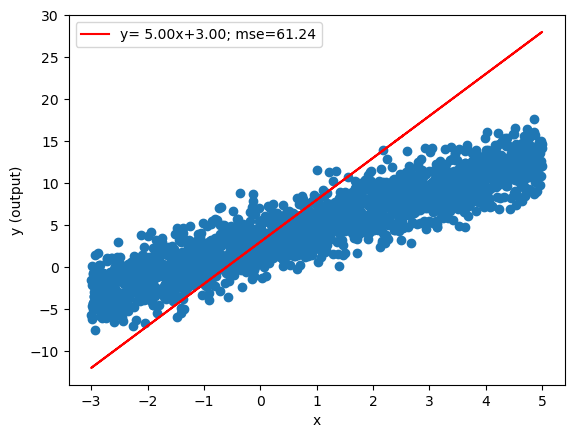

In [14]:
plot_model(x,y,5,3)

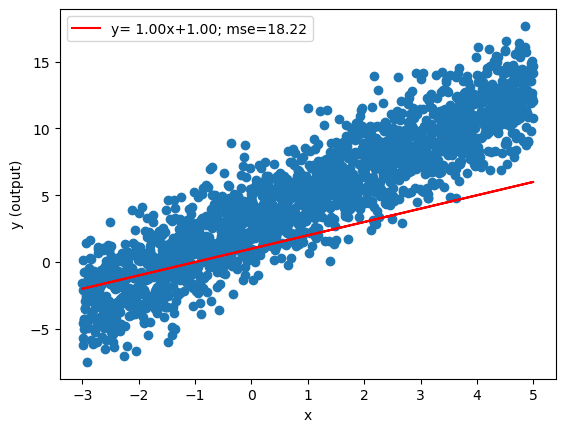

In [15]:
plot_model(x,y,1,1)

In [16]:
n_trails = 100
random_a = np.random.uniform(-5,5, n_trails)
random_b = np.random.uniform(-5, 5, n_trails)

In [17]:
min_mse, best_a, best_b = 1e50, 0, 0
for current_a in random_a:
    for current_b in random_b:
        y_model = current_a * x + current_b
        current_mse = mse(y, y_model)
        if current_mse < min_mse:
            min_mse = current_mse
            best_a = current_a
            best_b = current_b

min_mse

4.1291285610321244

In [18]:
best_a, best_b

(2.0451572887570455, 2.8936907876657116)

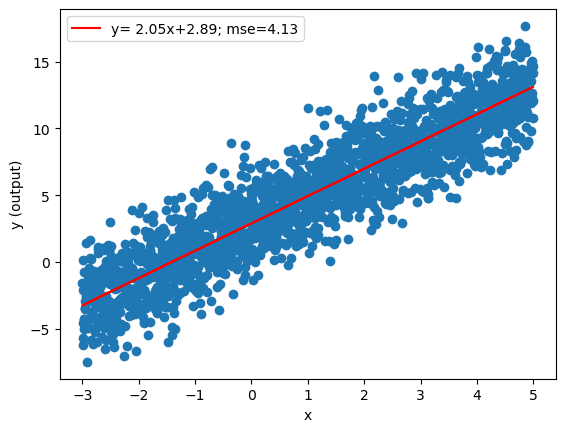

In [19]:
plot_model(x,y, best_a, best_b)

In [20]:
a,b = 5, 18
alpha = 0.001
a_gradient = -2 / len(x) * np.sum(x * (y - (a * x +b)))
b_gradient = -2 / len(y) * np.sum(y-(a*x+b))

In [21]:
y_tilde = a * x + b
mse(y, y_tilde)

377.8737411675936

In [22]:
[a_gradient, b_gradient]

[68.05336379446497, 36.10910244782765]

In [23]:
new_a = a - alpha*a_gradient

In [24]:
new_b = b - alpha * b_gradient

In [25]:
y_tilde = new_a * x + new_b
mse(y, y_tilde)

371.97418815110905

In [26]:
new_b = new_b - alpha * b_gradient
new_a = new_a - alpha*a_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

366.14578430831426

In [27]:
for i in range(100):
    new_b = new_b - alpha * b_gradient
    new_a = new_a - alpha*a_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

142.6087271623084

In [28]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x +b)))
    b_gradient = -2 / len(y) * np.sum(y-(a*x+b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)

In [29]:
model_a, model_b = -10, 20 # Start point; can be anywhere
alpha = 0.01 # Learning rate
all_errors = []
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x, y, model_a, model_b, alpha)
    if step % 100 == 0:
        y_model = model_a * x + model_b
        error = mse(y, y_model)
        all_errors.append(error)
        print("step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))
print("Final line: {} * x + {}".format(model_a, model_b))

step 0: a = -8.81893283754445, b = 19.898908975521724, J = 667.5915488772401
step 100: a = 1.3715286056869478, b = 6.451617568670207, J = 14.567102679029292
step 200: a = 1.8860938218556045, b = 3.611339500976768, J = 4.506111172842944
step 300: a = 1.9847934817385262, b = 3.066533743195587, J = 4.135940435825149
step 400: a = 2.003725473496484, b = 2.9620322876806573, J = 4.1223208661769855
step 500: a = 2.0073568974787794, b = 2.9419874294009016, J = 4.1218197658498905
step 600: a = 2.008053455997703, b = 2.93814254186823, J = 4.121801329031084
step 700: a = 2.008187065780711, b = 2.9374050380189844, J = 4.121800650691299
step 800: a = 2.008212694028203, b = 2.93726357434208, J = 4.121800625733369
step 900: a = 2.008217609888814, b = 2.9372364396065755, J = 4.1218006248151
step 1000: a = 2.008218552820458, b = 2.9372312347802407, J = 4.121800624781313
Final line: 2.008218552820458 * x + 2.9372312347802407


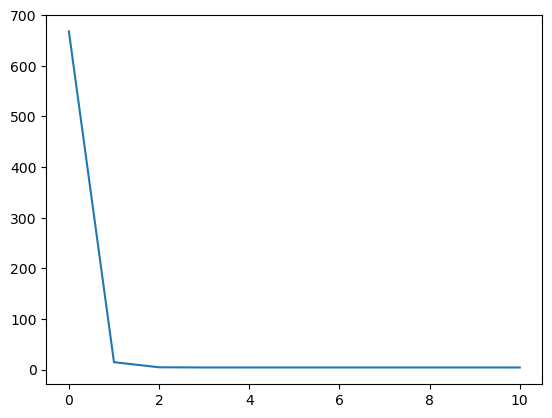

In [30]:
plt.plot(all_errors)

In [31]:
model_a, model_b = -10, 20 # Start point; can be anywhere
alpha = 0.01 # Learning rate
all_errors = []
for step in range(1001):
    model_a, model_b = perform_gradient_descent(x, y, model_a, model_b, alpha)
    if step % 100 == 0:
        y_model = model_a * x + model_b
        error = mse(y, y_model)
        all_errors.append(error)
print("Final line: {} * x + {}".format(model_a, model_b))

Final line: 2.008218552820458 * x + 2.9372312347802407


Text(0, 0.5, 'Training loss')

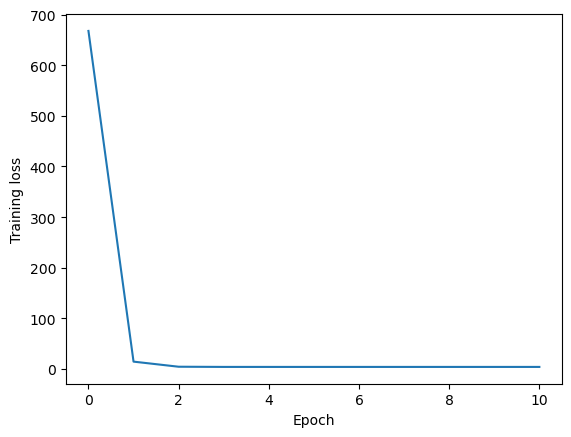

In [32]:
plt.plot(all_errors)
plt.xlabel("Epoch")
plt.ylabel("Training loss")

In [33]:
model_a, model_b

(2.008218552820458, 2.9372312347802407)

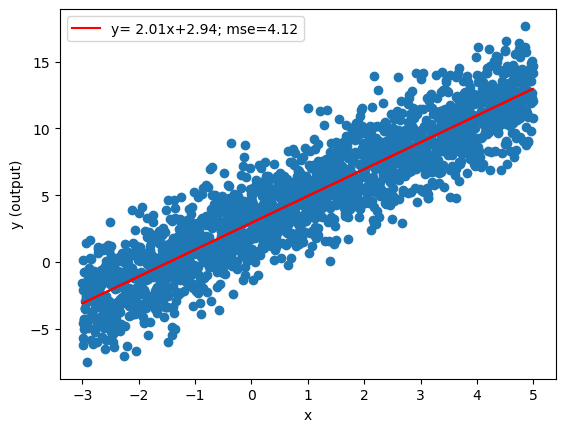

In [34]:
plot_model(x,y, model_a, model_b)

In [38]:
np.sqrt(error) # RMSE 

2.0302218166449975

In [40]:
linear_regression = LinearRegression()

In [46]:
x.reshape(-1, 1)

array([[2.53476738],
       [0.84192096],
       [0.81390695],
       ...,
       [1.13406703],
       [3.33116558],
       [2.39069535]])

In [47]:
linear_regression.fit(x.reshape(-1, 1), y)

LinearRegression()

In [48]:
linear_regression.coef_, linear_regression.intercept_

(array([2.00821878]), 2.937229999471102)

In [49]:
predicted = linear_regression.predict(x.reshape(-1,1))

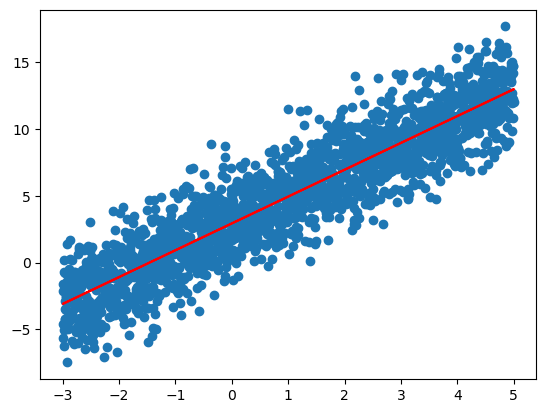

In [52]:
plt.scatter(x,y)
plt.plot(x, predicted, c='r')
plt.show()

In [53]:
linear_regression.score(x.reshape(-1,1),y)

0.8393207265011688

In [55]:
mean_squared_error(y, predicted)

4.121800624780023

In [56]:
mean_absolute_error(y, predicted)

1.6280709639196533

In [57]:
np.sqrt(mean_squared_error(y, predicted))

2.0302218166446795

## Logistic Regression

In [60]:
wine = load_wine()
wine_data = wine['data']
wine_lables= wine['target']

In [64]:
wine_data = pd.DataFrame(wine_data)

In [65]:
wine_data.columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

In [67]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [68]:
wine_lables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [69]:
logistic_regression = LogisticRegression()

In [70]:
logistic_regression.fit(wine_data, wine_lables)

/home/stilyan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
(logistic_regression.predict(wine_data) == wine_lables).sum() / len(wine_lables)

0.9662921348314607

In [75]:
accuracy_score(wine_lables, logistic_regression.predict(wine_data))

0.9662921348314607

In [90]:
wine_data_train, wine_data_test, wine_label_train, wine_label_test = train_test_split(wine_data, wine_lables, test_size = 50)

In [91]:
len(wine_data_train)

128

In [92]:
len(wine_data_test) 

50

In [93]:
len(wine_label_train) 

128

In [94]:
len(wine_label_test)

50

In [103]:
new_logistic_regresion = LogisticRegression(max_iter= 5000)

In [104]:
new_logistic_regresion.fit(wine_data_train, wine_label_train)

LogisticRegression(max_iter=5000)

In [105]:
new_logistic_regresion.score(wine_data_train, wine_label_train)

1.0

In [106]:
new_logistic_regresion.score(wine_data_test, wine_label_test)

0.92